In [1]:
import imageio
import numpy as np
from skimage.feature import canny
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 10.0)

In [2]:
airport = imageio.imread("week7/airport.tif")

In [3]:
cannied = canny(airport, sigma=2, low_threshold=1, high_threshold=200)

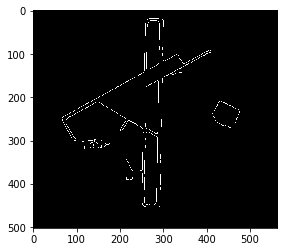

In [4]:
plt.imshow(cannied, cmap="gray")

In [5]:
from skimage.transform import hough_line, hough_line_peaks

In [6]:
lines, angles, d = hough_line(cannied)

In [7]:
lines[1].shape

(180,)

/home/anton/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


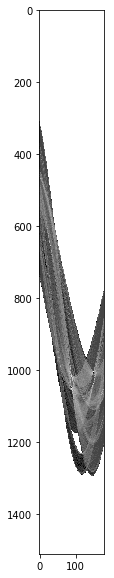

In [8]:
plt.figure(figsize=(10, 10))
plt.imshow(np.log(lines), cmap="gray")

In [9]:
peaks = hough_line_peaks(lines, angles, d, num_peaks=3)

In [10]:
peaks

(array([165, 163, 154], dtype=uint64),
 array([1.06182322, 0.0263262 , 0.0087754 ]),
 array([249.66512244, 302.70019854, 289.69159497]))

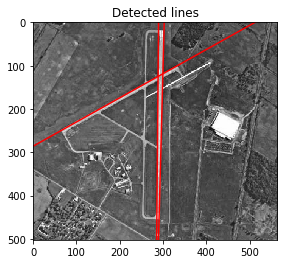

In [20]:
origin = np.array((0, airport.shape[1]))
for _, angle, dist in zip(*hough_line_peaks(lines, angles, d, num_peaks=3)):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    plt.plot(origin, (y0, y1), '-r')
    plt.imshow(airport, cmap="gray")
    plt.xlim(origin)
    plt.ylim((airport.shape[0], 0))
    #plt.set_axis_off()
    plt.title('Detected lines')

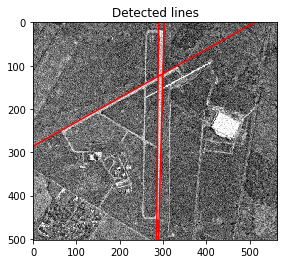

In [32]:
from skimage.util import random_noise
noised = random_noise(airport, var=0.01) * 255
cannied_noised = canny(noised, sigma=2, low_threshold=1, high_threshold=200)
lines, angles, d = hough_line(cannied_noised)
origin = np.array((0, airport.shape[1]))
for _, angle, dist in zip(*hough_line_peaks(lines, angles, d, num_peaks=3)):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    plt.plot(origin, (y0, y1), '-r')
    plt.imshow(noised, cmap="gray")
    plt.xlim(origin)
    plt.ylim((noised.shape[0], 0))
    #plt.set_axis_off()
    plt.title('Detected lines')